# Cross-Cohort Music Recommendation - EDA

You are a data scientist for a remote education company. Your manager is interested in exploring non-traditional ways of boosting remote student engagement.

One avenue that they would like to particularly explore is the effect of "waiting-room" music on a students attentiveness for a 4-hour class. They've provided you a dataset of 61 songs and their "music2vec" embeddings.

You will complete the idiomatic steps of the machine-learning pipeline:
* EDA: what sorts of relationships/clusterings do you notice within your dataset?
* Machine Learning: which machine learning pipeline should you apply to your dataset. How will you measure the effectiveness of this model?

Once you generate your machine learning model, you will then serialize it and load it into a dashboard which provides song recommendations based on a users listening history.

To run this dashboard execute the following command in your terminal (after you've completed clustering)

```bash
streamlit run recommender.py
```

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [32]:
# TODO: load in dataset
songs = pd.read_csv('../data/music_embeds.csv')

# TODO: view first few columns
songs.head()

,filename,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,song,genre
0,A Fan's Mail,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,...,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774,A Fan's Mail,funk
1,Abracadabra,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,...,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757,Abracadabra,pop
2,Aguas De Marco,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,...,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079,Aguas De Marco,bossa nova
3,Another Time,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,...,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729,Another Time,hip hop
4,Belong to the World,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,...,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235,Belong to the World,hip hop


In [ ]:
# TODO: select your predictive columns
X = songs.drop(columns=['song', 'genre', 'filename'])

# TODO: select your song-name column for later manipulation
song_names = songs['song']

# TODO: select your genre column for later manipulation
genres = songs['genre'] 

0                       A Fan's Mail
1                        Abracadabra
2                     Aguas De Marco
3                       Another Time
4                Belong to the World
                   ...              
56                         Valentina
57                           Wake Up
58        What You Won't Do for Love
59              Where's Your Head At
60    You Don't Know What's Going On
Name: song, Length: 61, dtype: object

In [38]:
# TODO: Using PCA, decompose your embeddings into 4 components for easy visualization
pca = PCA(n_components=4)

# TODO: fit & transform your predictors
x_transformed = pca.fit_transform(X)

# TODO: view your PCA components
pca_df = pd.DataFrame(data=x_transformed, columns=[f'PC{i+1}' for i in range(4)])
pca_df


,PC1,PC2,PC3,PC4
0,0.084061,-0.077482,-0.063781,-0.062137
1,0.332044,-0.154053,-0.060291,0.151909
2,-0.011686,0.194544,-0.046370,0.046989
3,0.009237,-0.109553,-0.111190,-0.089918
4,0.308582,-0.040624,-0.119071,0.149660
...,...,...,...,...
56,-0.137086,0.073600,-0.171687,0.035066
57,0.422397,-0.047345,-0.085399,-0.007514
58,0.093011,0.142711,0.060457,0.102592
59,0.293078,0.000349,-0.091521,0.022815


In [39]:
# TODO: transform your X_pca variable into a dataframe
pca_df = pd.DataFrame(data=x_transformed, columns=[f'PC{i+1}' for i in range(4)])

# TODO: merge your pca components, song name, and genre together into one dataframe (be sure to merge on the index)
merged_df = pd.concat([pca_df, song_names, genres], axis=1)

# TODO: view the first 5 rows of your merged df
merged_df.head()

,PC1,PC2,PC3,PC4,song,genre
0,0.084061,-0.077482,-0.063781,-0.062137,A Fan's Mail,funk
1,0.332044,-0.154053,-0.060291,0.151909,Abracadabra,pop
2,-0.011686,0.194544,-0.046370,0.046989,Aguas De Marco,bossa nova
3,0.009237,-0.109553,-0.111190,-0.089918,Another Time,hip hop
4,0.308582,-0.040624,-0.119071,0.149660,Belong to the World,hip hop


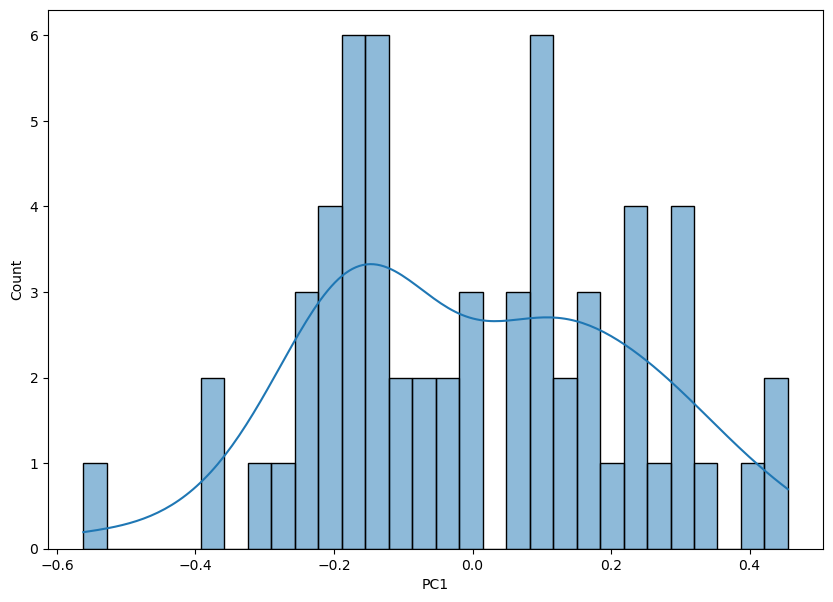

In [42]:
# TODO: BEGIN YOUR EDA! Create as many code-blocks as you need to answer your questions below
# histogram of pca_df
plt.figure(figsize=(10 ,7))
sns.histplot(data=pca_df, x='PC1', kde=True, bins=30)
plt.show()

## Questions

Using the visualizations you've generated, answer the 4 exploratory questions below. If you are not able to answer this question, describe to the best of your ability, what sorts of roadblocks, errors, or questions  you encountered when attempting to answer the question. This will be sufficient for a full grade.

An example of what this looks like is included below.

### Example Question

Which individual tracks are outliers in PC space?

I’m not entirely sure of the exact formula or functions to use here
* Whats the right threshold for calling something an "outlier"?
* How do I handle missing or extreme PCA values before finding outliers?

### Q1 

How are songs distributed (if a distribution exists) in the principal‐component dimensions by genre?

[Answer Here]

### Q2 

Which genre shows the highest (and lowest) average value on PC1?

[Answer Here]

### Q3 

Do any genres exhibit particularly wide dispersion along PC3?

[Answer Here]

### Q4

Are any pairs of PCA components strongly correlated?

[Answer Here]